In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split as tts

### Generating DATA

In [5]:
path='../Salary_Data.csv'
data=pd.read_csv(path)
print(data.dtypes,'\n',data.shape)
data.head()

YearsExperience    float64
Salary             float64
dtype: object 
 (30, 2)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [22]:
inputs=data.drop('Salary',axis=1)
target=pd.DataFrame(data['Salary'])
x_train,x_test,y_train,y_test=tts(inputs,target,test_size=0.3,random_state=42)

In [25]:
lr=lr()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [28]:
print('Residuals: \n',y_test-y_pred)

Residuals: 
           Salary
27  -2938.622884
15  -3741.938782
23  11313.091530
17   7672.428529
8    8641.500149
9   -3284.040713
28    280.019910
24   2262.550668
12  -6317.765230


In [32]:
from sklearn.metrics import mean_squared_error as mse,auc

In [33]:
print('Mean squared error',mse(y_pred,y_test))

Mean squared error 37784662.46621317


### Visuals

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [47]:
x=np.linspace(0,15)

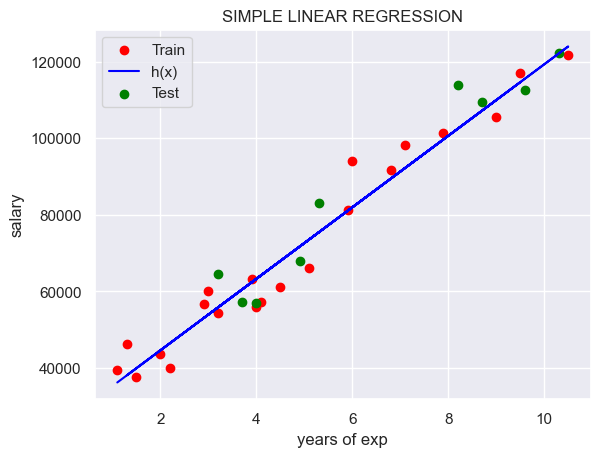

In [70]:
plt.figure()
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,lr.predict(x_train),color='blue')
plt.scatter(x_test,y_test,color='green')
plt.xlabel('years of exp')
plt.ylabel('salary')
plt.title('SIMPLE LINEAR REGRESSION')
plt.legend(['Train','h(x)','Test'])
plt.show()